### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fqtoolkit import dgToDf as dtd
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.tree import DecisionTreeRegressor

### Data
#TODO 어디서 데이터를 가지고 왔는가?

In [5]:
assets, liability, sale, income, price = [item[1] for item in dtd("data2.xlsx", "Sheet1", 5).items()]

In [6]:
assets0 = assets.pct_change()
liability0 = liability.pct_change()

In [40]:
price.shift(4)

,삼성전자,SK하이닉스,삼성SDI,현대차,카카오,기아,POSCO홀딩스,현대모비스,한국전력,SK텔레콤,...,기업은행,롯데케미칼,한국조선해양,한온시스템,HLB,CJ ENM,동진쎄미켐,동화기업,네이처셀,주성엔지니어링
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,3910,462551,33804,10835,20556,4742,66682,4084,22418,27294,...,1932,12025,24933,509,2089349,55538,2790,4637,4572,36388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,73383,101514,716919,196296,117945,78381,320871,250125,23550,53564,...,9771,232815,102000,15431,56500,149156,31373,91500,20850,11562
2022-02-28,69125,101514,732895,204148,125442,82145,287811,249136,22600,51167,...,10283,216427,103000,14198,42100,173786,34914,84400,19700,11165
2022-03-31,70610,112356,686964,191880,121943,75099,253780,217994,20750,52221,...,9585,194254,87500,12769,36000,133787,33567,110900,17700,16028


In [43]:
price = price.dropna(axis=1)
returns = price.shift(12+6).pct_change()

returns

,삼성전자,SK하이닉스,삼성SDI,현대차,카카오,기아,POSCO홀딩스,현대모비스,한국전력,SK텔레콤,...,기업은행,롯데케미칼,한국조선해양,한온시스템,HLB,CJ ENM,동진쎄미켐,동화기업,네이처셀,주성엔지니어링
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,0.096598,-0.027025,0.093534,0.294771,0.284103,0.260543,0.112072,0.070313,-0.020492,0.045026,...,0.003782,0.008978,0.020595,0.099343,-0.097196,0.043517,0.122576,0.483533,0.048673,0.248111
2022-02-28,-0.067365,-0.092993,0.138365,0.395263,0.184868,0.050754,-0.046515,0.090025,0.073279,0.124718,...,-0.002512,0.124630,-0.033632,0.295209,0.038276,0.031274,0.050619,-0.092836,0.123418,-0.064293
2022-03-31,0.084328,0.118508,-0.041989,0.011329,-0.104420,0.104813,0.070547,0.026787,-0.004848,-0.040314,...,-0.009931,0.036941,-0.040603,-0.037232,0.194703,0.198822,-0.106929,-0.083426,-0.075117,0.064243


In [37]:
rolling_period = 122
results = {}

for col in returns.columns:
    reSeries = {}
    for n in range(1, returns.shape[0]-rolling_period):
        
        temp = pd.DataFrame({"asset":assets0[col].iloc[n:n+rolling_period-1],
                            "liability":liability0[col].iloc[n:n+rolling_period-1],
                            "sale":sale[col].iloc[n:n+rolling_period-1],
                            "income":income[col].iloc[n:n+rolling_period-1],
                             "re0": returns[col].iloc[n-1:n+rolling_period-2],
                            "re": returns[col].iloc[n:n+rolling_period-1]})
        temp = temp.dropna()
        future = returns[col].iloc[n+120]
        
        if temp.shape[0] < 50:
            continue
            
        model = DecisionTreeRegressor(max_depth=6)#
        model.fit(temp.drop("re", axis=1).iloc[:-1,:], temp["re"].iloc[:-1])
        
        r = model.predict(temp.drop("re", axis=1).iloc[[-1], :])
        
        reSeries[temp.index[-1]] = temp["re"].iloc[-1]-r[0]
        
    if len(reSeries) > 0:
        results[col] = pd.Series(reSeries)

In [42]:
assets

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,카카오,LG화학,기아,...,네이처셀,주성엔지니어링,SFA반도체,덕산네오룩스,메가스터디교육,NICE평가정보,피엔티,케어젠,와이지엔터테인먼트,에이비엘바이오
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-02-29,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-03-31,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-04-30,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-05-31,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
results

{'삼성전자': 2010-01-31   -0.001865
 2010-02-28   -0.014289
 2010-03-31   -0.002447
 2010-04-30   -0.002023
 2010-05-31   -0.002099
                 ...   
 2021-08-31    0.000863
 2021-09-30    0.000246
 2021-10-31    0.000859
 2021-11-30   -0.000552
 2021-12-31   -0.000179
 Length: 144, dtype: float64,
 'SK하이닉스': 2010-01-31    0.005909
 2010-02-28   -0.004771
 2010-03-31    0.013273
 2010-04-30    0.002375
 2010-05-31    0.008998
                 ...   
 2021-08-31    0.001085
 2021-09-30    0.000625
 2021-10-31   -0.001735
 2021-11-30    0.003464
 2021-12-31   -0.004514
 Length: 144, dtype: float64,
 '삼성SDI': 2010-01-31   -0.003575
 2010-02-28    0.001622
 2010-03-31   -0.001738
 2010-04-30    0.004698
 2010-05-31   -0.005478
                 ...   
 2021-08-31    0.000581
 2021-09-30    0.001324
 2021-10-31   -0.001741
 2021-11-30    0.000630
 2021-12-31    0.001728
 Length: 144, dtype: float64,
 '현대차': 2010-01-31   -0.000057
 2010-02-28    0.000176
 2010-03-31   -0.002834
 2010-04-30 

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
r2 = []
acc = []

for n in range(12, 48):
    results = pd.DataFrame(results)
    signal = (results).mean(axis=1)

    signal = (signal-signal.shift(1).rolling(n).mean())/signal.shift(1).rolling(n).std() #변경 말것!
    temp = pd.DataFrame({"returns":returns.shift(-1).mean(axis=1), "result":signal}).dropna()

    test = temp.iloc[int(temp.shape[0]/4):2*int(temp.shape[0]/4), :]
    test0 = temp.iloc[2*int(temp.shape[0]/4):, :]
    
    training = temp.iloc[:int(temp.shape[0]/4), :]

    mu = training.result.mean()
    sd = training.result.std()

    test.result = (test.result-mu)/sd

    test0.result = (test0.result-mu)/sd
    
    training.result = (training.result - mu) /sd


    test["returns+"] = np.where(test["returns"] > 0, test["returns"], 0)
    test0["returns+"] = np.where(test0["returns"] > 0, test0["returns"], 0)

    test["port"] = test["returns"] * np.where(-test.result>2, 1, 0)
    test0["port"] = test0["returns"] *np.where(-test0.result>2, 1, 0)
    
    acc.append(accuracy_score(np.where(test.returns>0, 1, 0), np.where(-test.result>0, 1, 0)))

    from sklearn.metrics import accuracy_score

    print(f"{np.corrcoef(test.returns, -test.result)[1,0 ] ** 2 * 100:.4f}%")
    
    r2.append(np.corrcoef(test.returns, -test.result)[1,0 ] ** 2)

1.2015%
1.0767%
1.1197%
1.1680%
1.4186%
1.6200%
1.5787%
1.4433%
1.3555%
1.3828%
1.5161%
1.2878%
1.9127%
0.7655%
0.5562%
0.0601%
5.9561%
21.2111%
21.4603%
20.7458%
24.3974%
23.0676%
23.1607%
25.8113%
23.4200%
19.3589%
19.9514%
17.9330%
16.9660%
10.3747%
6.5352%
10.6706%
8.4971%
4.7767%
7.3731%
3.4446%


In [16]:
pd.Series(r2, index=range(12, 48)).argmax()+12

35

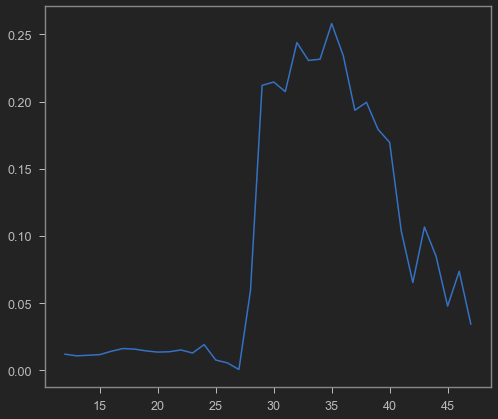

In [17]:
plt.plot(range(12, 48), r2)

In [18]:
n = 33

results = pd.DataFrame(results)

signal = (results).mean(axis=1)
#
signal = (signal-signal.shift(1).rolling(n).mean())/signal.shift(1).rolling(n).std() #변경 말것!
temp = pd.DataFrame({"returns":returns.shift(-1).mean(axis=1), "result":signal}).dropna()
test = temp.iloc[int(temp.shape[0]/4):2*int(temp.shape[0]/4), :]
test0 = temp.iloc[2*int(temp.shape[0]/4):, :]

mu = temp.result.iloc[:int(temp.shape[0]/4)].mean()
sd = temp.result.iloc[:int(temp.shape[0]/4)].std()

test.result = (test.result-mu)/sd

test0.result = (test0.result-mu)/sd


test["returns+"] = np.where(test["returns"] > 0, test["returns"], 0)
test0["returns+"] = np.where(test0["returns"] > 0, test0["returns"], 0)

test["port"] = test["returns"] * -1*test.result#np.where(-1*test.result >0,, 0)
test0["port"] = test0["returns"] * np.where( -1*test0.result > 0, 1, 0)

from sklearn.metrics import classification_report

print(f"{np.corrcoef(test.returns, -test.result)[1,0 ] ** 2 * 100:.4f}%")
    
print(classification_report(np.where(test.returns> 0, 1, 0), np.where(-test.result >0, 1, 0)))

23.0676%
              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.71      0.94      0.81        18

    accuracy                           0.70        27
   macro avg       0.69      0.58      0.57        27
weighted avg       0.69      0.70      0.65        27



In [19]:
print(f"{np.corrcoef(test0.returns, -test0.result)[1,0 ] ** 2 * 100:.4f}%")
    
print(classification_report(np.where(test0.returns> 0, 1, 0), np.where(-test0.result >0, 1, 0)))

1.3022%
              precision    recall  f1-score   support

           0       0.29      0.24      0.26        17
           1       0.68      0.73      0.70        37

    accuracy                           0.57        54
   macro avg       0.48      0.48      0.48        54
weighted avg       0.55      0.57      0.56        54



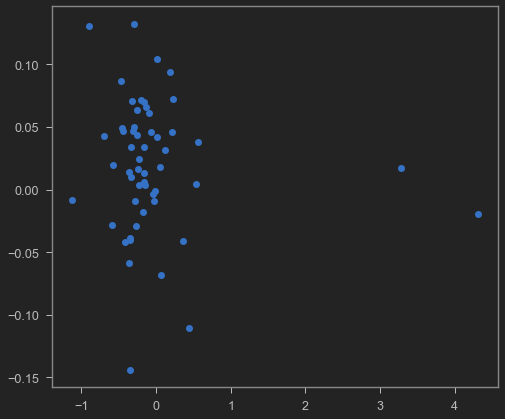

In [20]:
plt.plot(test0.result,test0.returns, "o")

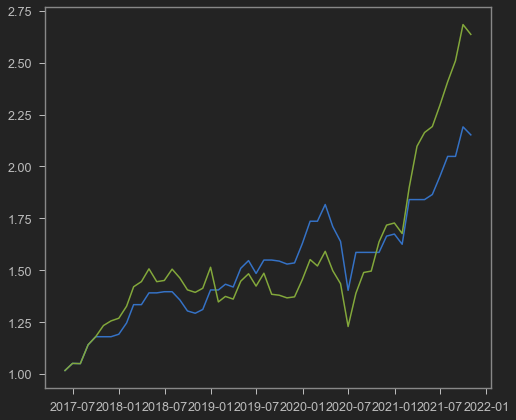

In [21]:
plt.plot((1+test0["port"]*1).cumprod())
plt.plot((1+test0.returns*1).cumprod())

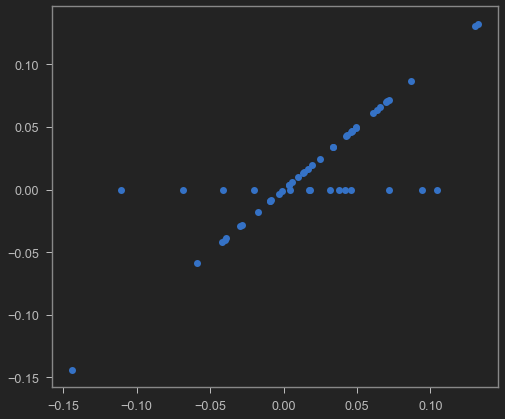

In [22]:
plt.plot(test0.returns ,test0["port"], "o")

In [23]:
print(test0["port"].mean() * np.sqrt(12)/ test0["port"].std())
print(test0["returns"].mean() * np.sqrt(12)/ test0["returns"].std())

1.1788766379312785
1.2713793632205936


In [24]:
test0.corr()

,returns,result,returns+,port
returns,1.000000,-0.114115,0.876075,0.817298
result,-0.114115,1.000000,-0.156194,-0.128092
returns+,0.876075,-0.156194,1.000000,0.742180
port,0.817298,-0.128092,0.742180,1.000000


In [25]:
sm.OLS(test0["port"], sm.add_constant(test0[["returns", "returns+"]])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   port   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     51.99
Date:                Sun, 22 May 2022   Prob (F-statistic):           4.91e-13
Time:                        15:23:20   Log-Likelihood:                 121.48
No. Observations:                  54   AIC:                            -237.0
Df Residuals:                      51   BIC:                            -231.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.006     -0.200      0.842      -0.013       0.011
returns        0.6072      0.141      4.314      0.000       0.325       0.890
returns+       0.1442      0.213      0.676      0.502      -0.284       0.573
==============================================================================
Omnibus:                       10.576   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.078
Skew:                          -0.761   Prob(JB):                      0.00238
Kurtosis:                       4.747   Cond. No.                         69.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

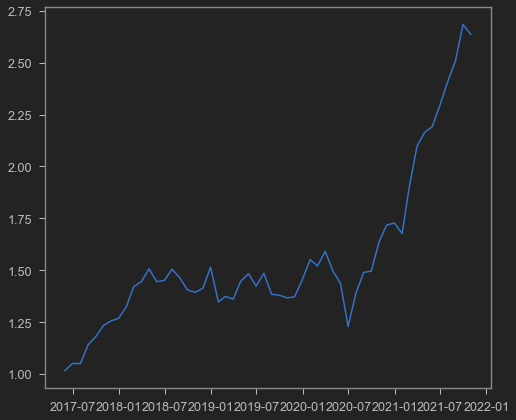

In [26]:
plt.plot((1+test0["returns"]).cumprod())

In [27]:
np.mean(np.where(test0["returns"]>0, 1, 0))

0.6851851851851852

In [28]:
from itertools import combinations as c

def estimation(bench, port):
    
    n0 = 0
    
    n = 0
    
    for t1, t2, t3 in c(range(len(bench)), 3):
        
        n0 += 1
        
        rms = bench.iloc[[t1, t2, t3]].sort_values()
        
        trueT1, trueT2, trueT3 = rms.index
        
        betaH = (port.loc[trueT3] - port.loc[trueT2]) / (bench.loc[trueT3] - bench.loc[trueT2])
        
        betaL = (port.loc[trueT2] - port.loc[trueT1]) / (bench.loc[trueT2] - bench.loc[trueT1])
        
        if betaH > betaL:
            
            n += 1
            
            
    return 2*(n / n0) -1
        
    
def kernel(rms, ris):
    
    rm1, rm2, rm3 = rms
    ri1, ri2, ri3 = ris
    
    premise = rm1 < rm2 and rm2 < rm3
    
    if not premise:
        
        return 0
    
    betaH = (ri3 - ri2) / (rm3 - rm2)
        
    betaL = (ri2 - ri1) / (rm2 - rm1)
    
    conclusion = betaH > betaL
    
    
    if  premise and not conclusion:
        
        return 0
    
    else:
        
        return 1
    
    
    
def stanardE(bench, port, esti):
    
    sum0 = 0
    
    for t1 in bench.index:
        
        sum1 = 0
        
        n0 = 0
        
        for t2, t3 in c(bench.index, 2):
            
            n0 += 1
            
            sum1 += kernel(bench.loc[[t1, t2, t3]], port.loc[[t1, t2, t3]])
            
            
        sum1 = (sum1 / n0 - esti) ** 2
        
        sum0 += sum1
        
        
    
    var = 9 / len(bench.index) * sum0
    
    return np.sqrt(var)
    
from scipy.stats import norm

def nonParaMT(bench, port):
    
    esti = estimation(bench, port)
    se = stanardE(bench, port, esti)
    
    statistic = esti * np.sqrt(len(bench)) /se
    
    pVal = 1 - norm.cdf(statistic, loc=0, scale=1)
    
    return esti, se , statistic, pVal

In [29]:
nonParaMT(test0["returns"], test0["port"])

(-0.3906627963231737,
 1.3533242362572893,
 -2.1212754937287936,
 0.9830506872929708)